# SPRINT 8 - Visualización de datos con Python

In [20]:
# Paso 1: conectar con la base de datos existente
import mysql.connector
import pandas as pd

def db_connect():
    try:
        if 'db' not in globals():
            global db
            db = mysql.connector.connect(host='localhost', database="mlg_sprint4", user="root", password="root")
            print("Conectado!")

    except Exception as e:
        exit("Error:", e)


## Tarea S08.01

### Nivel 1
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

<div class="alert alert-block alert-warning">

**NOTA:**  
Esta descripción es un tanto confusa: Python **NO** se conecta con *MySQL Workbench*; se puede conectar con el **servidor** de base de datos (RDBMS: _Relational DataBase Management Server_) MySQL (o MariaDB, o PostgreSQL, o...). *MySQL Workbench* es un **cliente** (que sí, puede gestionar el servidor) que se conecta al RDBMS, igual que lo hará Python.  
Puede que parezca "más fácil de entender", pero sigue siendo incorrecto.

Si en una entrevista técnica el aspirante dijese eso, posiblemente perdería puntos.
</div>

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

####

#### T8.01 N1N1 Visualización de una variable numérica

He elegido representar las operaciones declinadas y completadas.

Para ello, hay que agrupar y contar las operaciones teniendo en cuenta si fueron completadas o no:
º

C:\Users\formacio\AppData\Local\Temp\ipykernel_3684\3459745482.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=db, columns=["declined"])


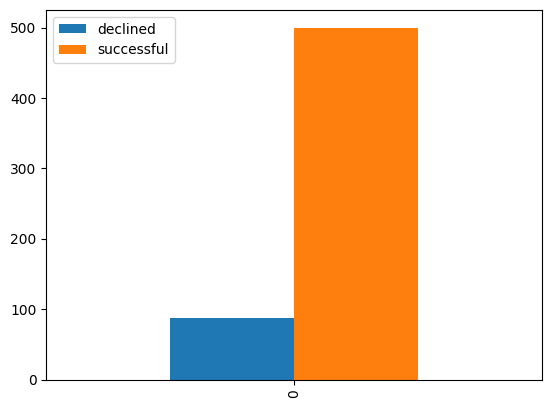

In [30]:
db_connect()

query = '''
SELECT SUM(declined)   AS declined
     , SUM(declined=0) AS successful
  FROM `transaction`
'''
if db and db.is_connected:
    df = pd.read_sql(query, con=db, columns=["declined"])
    df.plot.bar()

#### T8.01 N1N2 Visualización de dos variables numéricas

Continuando con las operaciones declinadas, veamos cómo lo han sido mes a mes.

Pra ello, hay que agrupar las transacciones por mes (será la segunda variable numérica).


```sql
SELECT SUM(declined)   AS declined
     , SUM(declined=0) AS successful
  FROM `transaction`
   GROUP BY MONTH(transaction_ts)
```

C:\Users\formacio\AppData\Local\Temp\ipykernel_3684\4083645749.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


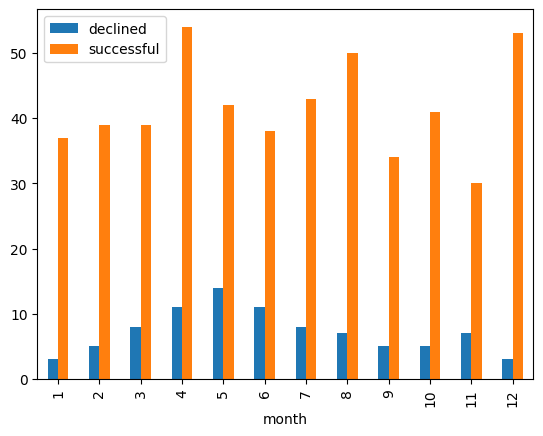

In [7]:
db_connect()

query = '''
   SELECT MONTH(transaction_ts) AS month
        , SUM(declined)   AS declined
        , SUM(declined=0) AS successful
     FROM `transaction`
 GROUP BY MONTH(transaction_ts)
 ORDER BY month
'''
if db and db.is_connected:
    df = pd.read_sql(query, db)
    df.plot.bar(x="month")

sin embargo, lo correcto debería ser extraer solo los datos de la tabla, y "procesar" los datos con Pandas (agregaciones y demás).

In [31]:
db_connect()

if db and db.is_connected:
    df = pd.read_sql('transaction', db, columns=[
        'transaction_ts',
        'amount',
        'declined'
    ])
    df.plot.bar()

C:\Users\formacio\AppData\Local\Temp\ipykernel_3684\1304696727.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('transaction', db, columns=[


DatabaseError: Execution failed on sql 'transaction': 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'transaction' at line 1